In [1]:
import pandas as pd
import numpy as np

## Read in Data

In [2]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
sample = pd.read_csv('data/sample_submission.csv')

## EDA

In [3]:
pd.DataFrame({'count': train.target.value_counts(), 
              'percentage': train.target.value_counts(normalize=True)})

,count,percentage
0,4342,0.57034
1,3271,0.42966


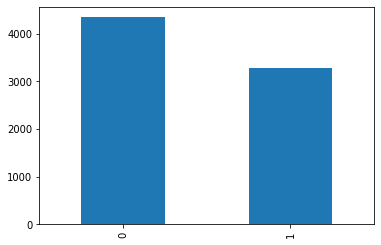

In [6]:
train["target"].value_counts().plot(kind='bar')

give keyords distinct numbers

In [16]:
def map_keywords(series):
    mapper = {}
    u_series = series.unique()
    for i in range(len(u_series)):
        mapper[u_series[i]] = i
        
    return mapper

train_keyword_map = map_keywords(train.keyword)

train['keyword_num'] = train['keyword'].map(train_keyword_map)
test['keyword_num'] = test['keyword'].map(test_keyword_map)

In [61]:
import re
import string
import nltk
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
from nltk.corpus import stopwords
#nltk.download('punkt')
#nltk.download('stopwords')
#nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
stop_words = stopwords.words('english')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/MikeTodisco/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [62]:
def text_preprocessing(data):
    #remove whitespace and lower all words
    data = data.apply(lambda x: x.strip().lower())
    #replace digits
    data = data.apply(lambda x: re.sub(r'\d+', '', x))
    #replace punctuation
    data = data.apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))
    #tokenize
    data = data.apply(lambda x : word_tokenize(x))
    #filter out stopwords
    data = data.apply(lambda x: [word for word in x if word not in stop_words])
    
    
    lemmatizer = WordNetLemmatizer()
    data = data.apply(lambda x: [lemmatizer.lemmatize(word, pos ='v') for word in x])
    
    data = data.apply(lambda x: [pos_tag(x)])
    return data

In [63]:
text_preprocessing(train.text)

0       [[(deeds, NNS), (reason, NN), (earthquake, NN)...
1       [[(forest, JJS), (fire, NN), (near, IN), (la, ...
2       [[(residents, NNS), (ask, VBP), (shelter, JJ),...
3       [[(people, NNS), (receive, VBP), (wildfires, N...
4       [[(get, VB), (send, JJ), (photo, NN), (ruby, N...
                              ...                        
7608    [[(two, CD), (giant, JJ), (crane, NN), (hold, ...
7609    [[(ariaahrary, JJ), (thetawniest, JJS), (contr...
7610    [[(utckm, JJ), (volcano, NN), (hawaii, NN), (h...
7611    [[(police, NNS), (investigate, VBP), (ebike, I...
7612    [[(latest, JJS), (home, NN), (raze, NN), (nort...
Name: text, Length: 7613, dtype: object

In [23]:
train.head()

,id,keyword,location,text,target,keyword_num
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,0
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,0
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,0
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,0
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,0
